In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install holidays

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import holidays

In [ ]:
main_path = '/content/drive/MyDrive/projects_data/FYP_20_Erandi'

In [ ]:
def get_day_of_week():
    date_obj = datetime.strptime(datetime.today().strftime('%m/%d/%Y'), '%m/%d/%Y')
    day = date_obj.strftime('%A')
    return day

def is_holiday(date, country='US'):
    us_holidays = holidays.CountryHoliday(country)
    return date in us_holidays

In [ ]:
print(get_day_of_week())

Wednesday


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
url = 'https://www.timeanddate.com/weather/sri-lanka/colombo'

In [ ]:
content = requests.get(url=url)
soup = BeautifulSoup(content.content, features="html.parser")
lists = soup.find_all('table', attrs={'class': "table table--left table--inner-borders-rows"})
print(lists)

[<table class="table table--left table--inner-borders-rows"><tbody><tr><th>Location: </th><td>Colombo</td></tr><tr><th>Current Time: </th><td id="wtct">9 jul 2025 17:19:02</td></tr><tr><th>Latest Report: </th><td>9 jul 2025 11:30</td></tr><tr><th>Visibility: </th><td>20 km</td></tr><tr><th>Pressure: </th><td>1010 mbar</td></tr><tr><th>Humidity: </th><td>61%</td></tr><tr><th>Dew Point: </th><td>22 °C</td></tr></tbody></table>]


In [ ]:
soup = BeautifulSoup(str(lists[0]), "html.parser")
data = {}

for row in soup.find_all("tr"):
    th = row.find("th").text.strip().replace(":", "")
    td = row.find("td").text.strip()
    data[th] = td

print(data)

{'Location': 'Colombo', 'Current Time': '9 jul 2025 17:19:02', 'Latest Report': '9 jul 2025 11:30', 'Visibility': '20\xa0km', 'Pressure': '1010 mbar', 'Humidity': '61%', 'Dew Point': '22\xa0°C'}


In [ ]:
import requests

API_KEY = "5b7998388e713d3b50a88ea385980bd9"
CITY = "Colombo"
URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(URL)
data = response.json()

if response.status_code == 200:
    print(f"City: {data['name']}")
    print(f"Temperature: {data['main']['temp']}°C")
    print(f"Weather: {data['weather'][0]['description']}")
else:
    print("Error:", data["message"])


City: Colombo
Temperature: 30.58°C
Weather: broken clouds


In [ ]:
!pip install --upgrade pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 79.6 MB/s eta 0:00:00


In [ ]:
import fitz
pdf_path = f"{main_path}/price_report_20250220_e.pdf"
doc = fitz.open(pdf_path)
pdf_text = ""
for page in doc:
    pdf_text += page.get_text() + "\n"
print(pdf_text)


Daily Price Report
A Summary of Price1 Developments - 20 February 2025
Yesterday
Today
Price of Carrot declined further in 
Dambulla market compared to 
yesterday due to favourable supply 
from Jaffna and Nuwara Eliya 
areas. 
q
Dambulla :
580.00
495.00
Price of Cabbage increased in both 
Pettah and Dambulla markets 
compared to yesterday due to 
limited supply from Nuwara Eliya 
and Yatawatta/ Dambulla areas, 
respectively.
p
Pettah :
Dambulla :
350.00
355.00
370.00
375.00
Price of Pumpkin declined in 
Dambulla market compared to 
yesterday due to favourable supply 
from Mahiyanganaya and Elahera 
areas.
q
Dambulla :
188.00
175.00
Price of Green Chilli declined 
further in Dambulla market 
compared to yesterday due to 
favourable supply from Kalpitiya, 
Hanguranketha and Elahera areas.
q
Dambulla :
1,330.00
1,230.00
Wholesale price of Linna declined 
in both Peliyagoda and Negombo 
fish markets compared to yesterday 
due to favourable supply from 
Southern coastal area.
q
Peliyagoda :

In [ ]:
df = pd.read_csv(f"{main_path}/fruit_storage_data.csv")
df.head()

,Fruit,Room Temperature,Refrigerated,Frozen
0,Apples,7-10 days,4-6 weeks,8-12 months
1,Bananas,2-5 days,5-7 days,6-8 months
2,"Citrus Fruits (Oranges, Lemons, Limes, Grapefr...",7-10 days,3-4 weeks,3-6 months
3,Pears,3-5 days,3-5 days,10-12 months
4,Avocados,2-5 days,3-5 days,3-6 months


In [ ]:
def extract_min_value(value):
    if pd.isna(value):
        return None
    match = re.search(r"(\d+)-(\d+)", str(value))
    if match:
        return int(match.group(1))
    match = re.search(r"(\d+)", str(value))
    if match:
        return int(match.group(1))
    return None
df["Room Temperature (Days)"] = df["Room Temperature"].apply(extract_min_value)
df["Refrigerated (Days)"] = df["Refrigerated"].apply(extract_min_value)
df["Frozen (Months)"] = df["Frozen"].apply(extract_min_value)
df = df.drop(columns=["Room Temperature", "Refrigerated", "Frozen"])
cleaned_csv_filename = "fruit_storage_converted.csv"
df.to_csv(cleaned_csv_filename, index=False)
df.head()

,Fruit,Room Temperature (Days),Refrigerated (Days),Frozen (Months)
0,Apples,7,4,8
1,Bananas,2,5,6
2,"Citrus Fruits (Oranges, Lemons, Limes, Grapefr...",7,3,3
3,Pears,3,3,10
4,Avocados,2,3,3


In [ ]:
df["Frozen (Days)"] = df["Frozen (Months)"] * 30  # Approximate months to days
df.head()

,Fruit,Room Temperature (Days),Refrigerated (Days),Frozen (Months),Frozen (Days)
0,Apples,7,4,8,240
1,Bananas,2,5,6,180
2,"Citrus Fruits (Oranges, Lemons, Limes, Grapefr...",7,3,3,90
3,Pears,3,3,10,300
4,Avocados,2,3,3,90


In [ ]:
fruit_refrigerated_dict = df.set_index("Fruit")["Refrigerated (Days)"].to_dict()
print(fruit_refrigerated_dict)

{'Apples': 4, 'Bananas': 5, 'Citrus Fruits (Oranges, Lemons, Limes, Grapefruits)': 3, 'Pears': 3, 'Avocados': 3, 'Mangoes': 5, 'Stone Fruits (Peaches, Plums, Nectarines, Apricots, Cherries)': 3, 'Berries (Strawberries, Blueberries, Raspberries, Blackberries)': 3, 'Grapes': 1, 'Pineapple': 3, 'Watermelon, Cantaloupe, Honeydew Melon': 3, 'Kiwi': 7, 'Papaya': 3, 'Coconut (Whole and Shredded)': 1}


In [ ]:
import inflect
import re
p = inflect.engine()

new_fruit_data = {}

for key, value in fruit_refrigerated_dict.items():
    # Remove content in parentheses and lowercase
    cleaned = re.sub(r'\([^)]*\)', '', key).strip().lower()
    # Split by comma and 'and' to singularize each term
    parts = re.split(r',|\band\b', cleaned)
    parts = [p.singular_noun(part.strip()) or part.strip() for part in parts]
    singular_key = ', '.join(parts)
    new_fruit_data[singular_key] = value

print(new_fruit_data)


{'apple': 4, 'banana': 5, 'citrus fruit': 3, 'pear': 3, 'avocado': 3, 'mango': 5, 'stone fruit': 3, 'berry': 3, 'grape': 1, 'pineapple': 3, 'watermelon, cantaloupe, honeydew melon': 3, 'kiwi': 7, 'papaya': 3, 'coconut': 1}


In [ ]:
fruits = {'apple': 0, 'mango': 1, 'orange': 2, 'pineapple': 3, 'woodapple': 4, 'watermelon': 5, 'papaya': 6, 'avocado': 7, 'dragonfruit': 8, 'anoda': 9, 'banana': 10}

In [ ]:
input_fruits = [{
    'fruit':'apple',
    'current_stock':0
},{
    'fruit':'banana',
    'current_stock':0
},{
    'fruit':'avocado',
    'current_stock':0
}]

In [ ]:
import joblib
fruit_price_model = joblib.load(f"{main_path}/model.pkl")

In [ ]:
import random

base_features = {
    'temp': 279,
    'dew_point': 276.66,
    'feels_like': 276.74,
    'temp_min': 279.19,
    'temp_max': 280.11,
    'pressure': 1005,
    'humidity': 80,
    'wind_speed': 5.5,
    'wind_deg': 206,
    'clouds_all': 62,
}

def generate_random_near_values(base_features, percent_variation=5):
    random_features = {}
    for key, value in base_features.items():
        variation = abs(value) * (percent_variation / 100)
        low = value - variation
        high = value + variation

        # If it's an integer field, round the result
        if isinstance(value, int):
            random_features[key] = random.randint(round(low), round(high))
        else:
            random_features[key] = round(random.uniform(low, high), 2)

    return random_features

# Example usage
random_sample = generate_random_near_values(base_features, percent_variation=5)
print(random_sample)


{'temp': 268, 'dew_point': 269.0, 'feels_like': 287.15, 'temp_min': 291.65, 'temp_max': 267.03, 'pressure': 1055, 'humidity': 79, 'wind_speed': 5.45, 'wind_deg': 213, 'clouds_all': 60}


In [ ]:
import requests

API_KEY = '5050aa1af8fc46e0a1c112033250907'  # Replace with your actual key
LOCATION = 'German'
weather_description = {'light snow': 0, 'broken clouds': 1, 'overcast clouds': 2, 'scattered clouds': 3, 'few clouds': 4, 'light rain': 5, 'snow': 6, 'sky is clear': 7, 'moderate rain': 8}

def get_wheather_data(type_ , no_of_days):
  DAYS = no_of_days
  feature_data = []
  url = f"http://api.weatherapi.com/v1/forecast.json?key={API_KEY}&q={LOCATION}&days={DAYS}&aqi=no&alerts=no"

  response = requests.get(url)
  data = response.json()
  for day in data['forecast']['forecastday']:
      hourly_data = day['hour'][12]
      condition = day['day']['condition']
      if type_ == 1:
        day_info = {
          'temp': day['day']['avgtemp_c']+273.15,
          'temp_max': day['day']['maxtemp_c']+273.15,
          'temp_min': day['day']['mintemp_c']+273.15,
          'feels_like': hourly_data['feelslike_c']+273.15,
          'humidity': day['day']['avghumidity'],
          'wind_speed': day['day']['maxwind_kph'],
          'wind_deg': hourly_data['wind_degree'],
          'pressure': hourly_data['pressure_mb'],
          'dew_point': hourly_data['dewpoint_c'],
          'clouds_all': hourly_data['cloud'],
          'weather_main':condition['code'],            # numeric weather code
          'weather_description': weather_description.get(condition['text'].lower(), 0)
        }
        print(day_info)
      else:
        day_info = {
          'temp': day['day']['avgtemp_c']+273.15,
          'temp_max': day['day']['maxtemp_c']+273.15,
          'temp_min': day['day']['mintemp_c']+273.15,
          'feels_like': hourly_data['feelslike_c']+273.15,
          'humidity': day['day']['avghumidity'],
          'wind_speed': day['day']['maxwind_kph'],
          'wind_deg': hourly_data['wind_degree'],
          'pressure': hourly_data['pressure_mb'],
          'dew_point': hourly_data['dewpoint_c'],
          'clouds_all': hourly_data['cloud'],
        }
        print(day_info)
      feature_data.append(day_info)
  return feature_data

In [ ]:
def get_conditions_on_date(date):
  features = generate_random_near_values(base_features, percent_variation=5)
  return features


In [ ]:
import pandas as pd

data = {
    'temp': 0.0,
    'visibility': 100.0,
    'dew_point': 0.0,
    'feels_like': 0.0,
    'temp_min': 0.0,
    'temp_max': 0.0,
    'pressure': 0.0,
    'sea_level': 100.0,
    'grnd_level': 100.0,
    'humidity': 0.0,
    'wind_speed': 0.0,
    'wind_deg': 0.0,
    'wind_gust': 100.0,
    'rain_1h': 88.706366,
    'rain_3h': 100.0,
    'clouds_all': 0.0,
    'fruit_type': 0.0,
    'price': 0.0
}

df = pd.DataFrame([data])  # Wrap dict in a list to make one row
df.head()



,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,clouds_all,fruit_type,price
0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,88.706366,100.0,0.0,0.0,0.0


In [ ]:
from datetime import datetime, timedelta

def get_dates_from_today(no_of_dates):
    today = datetime.today().date()
    return [(today + timedelta(days=i)).strftime('%Y/%m/%d') for i in range(no_of_dates)]

# Example usage:
no_of_dates = 5
dates_list = get_dates_from_today(no_of_dates)
print(dates_list)



['2025/07/09', '2025/07/10', '2025/07/11', '2025/07/12', '2025/07/13']


In [ ]:
def get_dates(fruit):
  no_of_dates = new_fruit_data[fruit]
  return no_of_dates

In [ ]:
def get_price_predictions(fruit):
  dates = get_dates(fruit)
  prices = {}
  i=1
  feature_list = get_wheather_data(0 , dates)
  for features in feature_list:
    features['fruit_type'] = fruits[fruit]
    df = pd.DataFrame([features])
    array = df.to_numpy().flatten()
    print(array)
    X = pd.get_dummies(df)
    print(X)
    prices[i] = float(fruit_price_model.predict([array])[0])
    i+=1
  return prices


In [ ]:
prices = get_price_predictions('apple')

{'temp': 300.15, 'temp_max': 307.34999999999997, 'temp_min': 296.75, 'feels_like': 306.84999999999997, 'humidity': 81, 'wind_speed': 24.8, 'wind_deg': 202, 'pressure': 1016.0, 'dew_point': 22.6, 'clouds_all': 29}
{'temp': 297.45, 'temp_max': 301.04999999999995, 'temp_min': 293.34999999999997, 'feels_like': 304.54999999999995, 'humidity': 90, 'wind_speed': 8.3, 'wind_deg': 196, 'pressure': 1015.0, 'dew_point': 23.9, 'clouds_all': 63}
{'temp': 298.34999999999997, 'temp_max': 302.45, 'temp_min': 295.75, 'feels_like': 304.45, 'humidity': 86, 'wind_speed': 8.3, 'wind_deg': 348, 'pressure': 1015.0, 'dew_point': 22.9, 'clouds_all': 65}
{'temp': 299.84999999999997, 'temp_max': 305.65, 'temp_min': 295.04999999999995, 'feels_like': 307.15, 'humidity': 76, 'wind_speed': 11.2, 'wind_deg': 218, 'pressure': 1016.0, 'dew_point': 22.6, 'clouds_all': 5}
{'temp': 299.84999999999997, 'temp_max': 306.45, 'temp_min': 295.45, 'feels_like': 307.84999999999997, 'humidity': 77, 'wind_speed': 11.5, 'wind_deg': 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
demand_model = joblib.load(f"{main_path}/demand_prediction_model_cpi.pkl")

In [ ]:
demand_fruits = {'cranberry': 0, 'apple': 1, 'banana': 2, 'mango juice': 3, 'passion fruit': 4, 'avacado': 5, 'tomato': 6}

In [ ]:
demand_features = {
    'temp': 279,
    'dew_point': 276.66,
    'feels_like': 276.74,
    'temp_min': 279.19,
    'temp_max': 280.11,
    'pressure': 1005,
    'humidity': 80,
    'wind_speed': 5.5,
    'wind_deg': 206,
    'clouds_all': 62,
    'weather_main': 1,
    'weather_description': 0,
    'Product':0,
    'Unit_Price': 1.5,
    'Discount': 0.1,
    'Total_Price': 6.75,
    'cpi': 120.8
}


In [ ]:
random_sample = generate_random_near_values(demand_features, percent_variation=5)
print(random_sample)

{'temp': 285, 'dew_point': 289.1, 'feels_like': 281.77, 'temp_min': 266.97, 'temp_max': 286.89, 'pressure': 1038, 'humidity': 79, 'wind_speed': 5.23, 'wind_deg': 209, 'clouds_all': 62, 'weather_main': 1, 'weather_description': 0, 'Product': 0, 'Unit_Price': 1.52, 'Discount': 0.1, 'Total_Price': 6.96, 'cpi': 120.1}


In [ ]:
def get_demand_predictions(fruit,today_price=100):
  dates = get_dates(fruit)
  demands = {}
  i=1
  feature_list = get_wheather_data(1 , dates)
  for features in feature_list:
    features['Product'] = demand_fruits[fruit]
    features['Unit_Price'] = today_price
    features['Discount'] = 0
    features['Total_Price'] = today_price
    features['cpi'] = 120.8
    df = pd.DataFrame([features])
    array = df.to_numpy().flatten()
    print(array)
    X = pd.get_dummies(df)
    print(X)
    demands[i] = float(demand_model.predict([array])[0])
    i+=1
  return demands

In [ ]:
demands = get_demand_predictions('apple')

{'temp': 300.15, 'temp_max': 307.34999999999997, 'temp_min': 296.75, 'feels_like': 306.84999999999997, 'humidity': 81, 'wind_speed': 24.8, 'wind_deg': 202, 'pressure': 1016.0, 'dew_point': 22.6, 'clouds_all': 29, 'weather_main': 1189, 'weather_description': 8}
{'temp': 297.45, 'temp_max': 301.04999999999995, 'temp_min': 293.34999999999997, 'feels_like': 304.54999999999995, 'humidity': 90, 'wind_speed': 8.3, 'wind_deg': 196, 'pressure': 1015.0, 'dew_point': 23.9, 'clouds_all': 63, 'weather_main': 1189, 'weather_description': 8}
{'temp': 298.34999999999997, 'temp_max': 302.45, 'temp_min': 295.75, 'feels_like': 304.45, 'humidity': 86, 'wind_speed': 8.3, 'wind_deg': 348, 'pressure': 1015.0, 'dew_point': 22.9, 'clouds_all': 65, 'weather_main': 1009, 'weather_description': 0}
{'temp': 299.84999999999997, 'temp_max': 305.65, 'temp_min': 295.04999999999995, 'feels_like': 307.15, 'humidity': 76, 'wind_speed': 11.2, 'wind_deg': 218, 'pressure': 1016.0, 'dew_point': 22.6, 'clouds_all': 5, 'weathe

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(prices)
print(demands)

{1: 648.92, 2: 648.09, 3: 648.8, 4: 649.02, 5: 648.85}
{1: 6833.61, 2: 6789.43, 3: 6795.89, 4: 6737.17, 5: 6787.31}


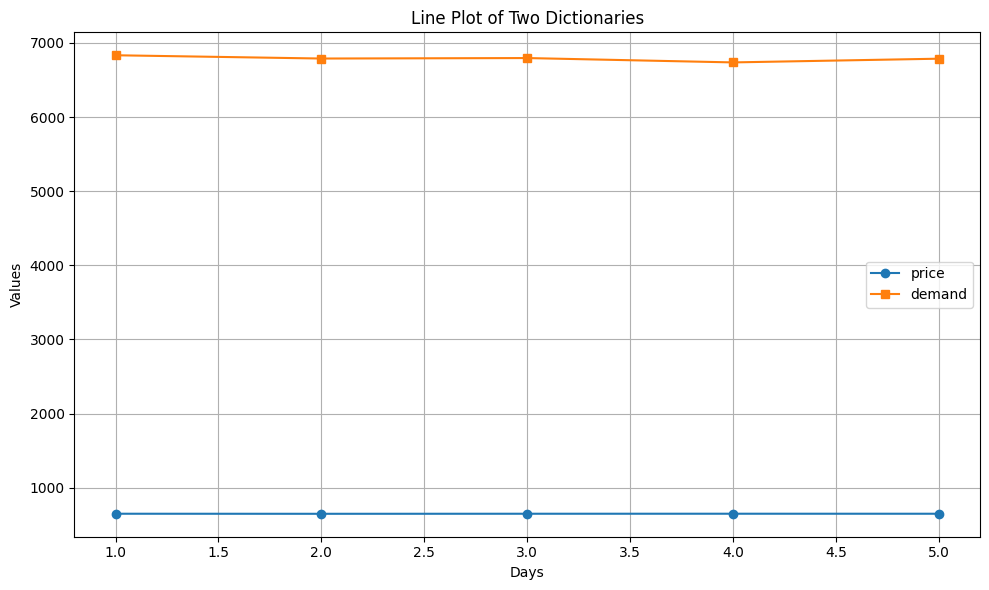

In [ ]:
import matplotlib.pyplot as plt

x = list(prices.keys())
y1 = list(prices.values())
y2 = list(demands.values())

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='price', marker='o')
plt.plot(x, y2, label='demand', marker='s')

# Labels and legend
plt.title("Line Plot of Two Dictionaries")
plt.xlabel("Days")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Final Analyse

In [ ]:
prices = get_price_predictions('apple')
demands = get_demand_predictions('apple')
print(prices)
print(demands)

{'temp': 300.15, 'temp_max': 307.34999999999997, 'temp_min': 296.75, 'feels_like': 306.84999999999997, 'humidity': 81, 'wind_speed': 24.8, 'wind_deg': 202, 'pressure': 1016.0, 'dew_point': 22.6, 'clouds_all': 29}
{'temp': 297.45, 'temp_max': 301.04999999999995, 'temp_min': 293.34999999999997, 'feels_like': 304.54999999999995, 'humidity': 90, 'wind_speed': 8.3, 'wind_deg': 196, 'pressure': 1015.0, 'dew_point': 23.9, 'clouds_all': 63}
{'temp': 298.34999999999997, 'temp_max': 302.45, 'temp_min': 295.75, 'feels_like': 304.45, 'humidity': 86, 'wind_speed': 8.3, 'wind_deg': 348, 'pressure': 1015.0, 'dew_point': 22.9, 'clouds_all': 65}
{'temp': 299.84999999999997, 'temp_max': 305.65, 'temp_min': 295.04999999999995, 'feels_like': 307.15, 'humidity': 76, 'wind_speed': 11.2, 'wind_deg': 218, 'pressure': 1016.0, 'dew_point': 22.6, 'clouds_all': 5}
{'temp': 299.84999999999997, 'temp_max': 306.45, 'temp_min': 295.45, 'feels_like': 307.84999999999997, 'humidity': 77, 'wind_speed': 11.5, 'wind_deg': 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

In [ ]:
cash_on_hand = 10000*700
result = {}
price1 = prices[1]
demand1 = demands[1]
units_buy = int(cash_on_hand / price1)
if units_buy >0:
  cash_balance = cash_on_hand - (price1*demand1)
  cash_on_hand = cash_balance
result[1] = {"units_buy":units_buy, "cash_on_hand":cash_on_hand, 'status':'Necessary'}
del prices[1]
del demands[1]
for n in prices:
  print(price1 , prices[n])
  if price1 < prices[n]:
    demand = demands[n]
    price = prices[n]
    units_buy = int(cash_on_hand / prices[n])
    if units_buy >0:
      cash_balance = cash_on_hand - (units_buy*prices[n])
      cash_on_hand = cash_balance
    result[n] = {"units_buy":units_buy, "cash_on_hand":cash_on_hand, 'status':'Price1 is Lower'}
    if cash_on_hand<= 0:
      break
  else:
    result[n] = {"units_buy":0, "cash_on_hand":cash_on_hand,'status':'Price1 is Higher'}
    break


648.92 648.09


In [ ]:
print(result)

{1: {'units_buy': 10787, 'cash_on_hand': 2565533.798800001, 'status': 'Necessary'}, 2: {'units_buy': 0, 'cash_on_hand': 2565533.798800001, 'status': 'Price1 is Higher'}}
